<a href="https://colab.research.google.com/github/ArminD93/OpenExoplanetCatalogue/blob/dev/OpenExoplanetCatalogue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Open Exoplanet Catalogue**

---


# **Spis treści:**
## 1. [Import bibliotek](#0)
## 2. [Prezentacja danych](#1)
## 3. [Brakujące wartości](#2)
## 4. [Przeglądanie danych](#3)
*   [Metoda odkrywania](#4)
*   [Kategorie odkryć planet](#5)
*   [Liczba odkrytych planet w latach 1992 - 2017](#6)
*   [Mapa korelacji](#7)


## <a name='0'></a> Import bibliotek

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import missingno as msno

## <a name='1'></a> Prezentacja danych

In [2]:
planets_raw = pd.read_csv('/content/drive/My Drive/ColabNotebooks/OpenExoplanetCatalogue/datasets/oec.csv', low_memory=False)

planets = planets_raw.copy()

planets.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryMethod,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,NaN,NaN,NaN,RV,2016.0,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,72.00,NaN,NaN,transit,2012.0,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,89.38,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,88.24,NaN,NaN,transit,NaN,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [3]:
planets.shape # Kształt danych

(3584, 25)

In [4]:
planets.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
PlanetIdentifier        3584 non-null object
TypeFlag                3584 non-null int64
PlanetaryMassJpt        1313 non-null float64
RadiusJpt               2774 non-null float64
PeriodDays              3485 non-null float64
SemiMajorAxisAU         1406 non-null float64
Eccentricity            1108 non-null float64
PeriastronDeg           328 non-null float64
LongitudeDeg            43 non-null float64
AscendingNodeDeg        46 non-null float64
InclinationDeg          665 non-null float64
SurfaceTempK            741 non-null float64
AgeGyr                  2 non-null float64
DiscoveryMethod         3521 non-null object
DiscoveryYear           3574 non-null float64
LastUpdated             3576 non-null object
RightAscension          3574 non-null object
Declination             3574 non-null object
DistFromSunParsec       2133 non-null float64
HostStarMassSlrMass     3416 non-nul

In [5]:
print('{} '.format(planets['DiscoveryMethod'].value_counts()))
print('-'*100)
print('{} '.format(planets['LastUpdated'].value_counts()))
print('-'*100)
print('{} '.format(planets['RightAscension'].value_counts()))
print('-'*100)
print('{} '.format(planets['Declination'].value_counts()))
print('-'*100)
print('{} '.format(planets['ListsPlanetIsOn'].value_counts()))

transit         2712
RV               692
imaging           52
microlensing      40
timing            25
Name: DiscoveryMethod, dtype: int64 
----------------------------------------------------------------------------------------------------
16/05/10    1283
14/02/26     726
11/09/12      38
14/02/24      34
15/12/03      25
            ... 
16/12/09       1
14/04/03       1
12/06/08       1
11/09/08       1
11/03/07       1
Name: LastUpdated, Length: 505, dtype: int64 
----------------------------------------------------------------------------------------------------
01 37 54    9
19 16 18    7
19 19 26    7
18 57 44    7
17 18 57    7
           ..
16 53 43    1
19 12 16    1
19 17 47    1
19 07 51    1
19 33 59    1
Name: RightAscension, Length: 2358, dtype: int64 
----------------------------------------------------------------------------------------------------
-60 30 42       9
-34 59 23       8
+38 20 37       7
-05 02 36.44    7
+49 18 19       7
               ..
+38 23 52 

In [6]:
for col in ['DiscoveryMethod', 'LastUpdated', 'DiscoveryMethod', 'RightAscension', 'Declination',  'ListsPlanetIsOn']:
    planets[col] = planets[col].astype('category')
planets.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
PlanetIdentifier        3584 non-null object
TypeFlag                3584 non-null int64
PlanetaryMassJpt        1313 non-null float64
RadiusJpt               2774 non-null float64
PeriodDays              3485 non-null float64
SemiMajorAxisAU         1406 non-null float64
Eccentricity            1108 non-null float64
PeriastronDeg           328 non-null float64
LongitudeDeg            43 non-null float64
AscendingNodeDeg        46 non-null float64
InclinationDeg          665 non-null float64
SurfaceTempK            741 non-null float64
AgeGyr                  2 non-null float64
DiscoveryMethod         3521 non-null category
DiscoveryYear           3574 non-null float64
LastUpdated             3576 non-null category
RightAscension          3574 non-null category
Declination             3574 non-null category
DistFromSunParsec       2133 non-null float64
HostStarMassSlrMass     3416

## <a name='2'></a> Brakujące wartości

In [7]:
# Liczba wartośći NaN dla każdej kolumny.
planets.isnull().sum().sort_values(ascending=False)

AgeGyr                  3582
LongitudeDeg            3541
AscendingNodeDeg        3538
PeriastronDeg           3256
HostStarAgeGyr          3067
InclinationDeg          2919
SurfaceTempK            2843
Eccentricity            2476
PlanetaryMassJpt        2271
SemiMajorAxisAU         2178
DistFromSunParsec       1451
HostStarMetallicity     1075
RadiusJpt                810
HostStarRadiusSlrRad     321
HostStarMassSlrMass      168
HostStarTempK            129
PeriodDays                99
DiscoveryMethod           63
DiscoveryYear             10
RightAscension            10
Declination               10
LastUpdated                8
TypeFlag                   0
ListsPlanetIsOn            0
PlanetIdentifier           0
dtype: int64

In [8]:
# procentowy brak danych dla każdej kolumny
print('{}'.format(planets.isnull().sum().sort_values(ascending=False) / len(planets) * 100))

AgeGyr                  99.944196
LongitudeDeg            98.800223
AscendingNodeDeg        98.716518
PeriastronDeg           90.848214
HostStarAgeGyr          85.574777
InclinationDeg          81.445312
SurfaceTempK            79.324777
Eccentricity            69.084821
PlanetaryMassJpt        63.364955
SemiMajorAxisAU         60.770089
DistFromSunParsec       40.485491
HostStarMetallicity     29.994420
RadiusJpt               22.600446
HostStarRadiusSlrRad     8.956473
HostStarMassSlrMass      4.687500
HostStarTempK            3.599330
PeriodDays               2.762277
DiscoveryMethod          1.757812
DiscoveryYear            0.279018
RightAscension           0.279018
Declination              0.279018
LastUpdated              0.223214
TypeFlag                 0.000000
ListsPlanetIsOn          0.000000
PlanetIdentifier         0.000000
dtype: float64


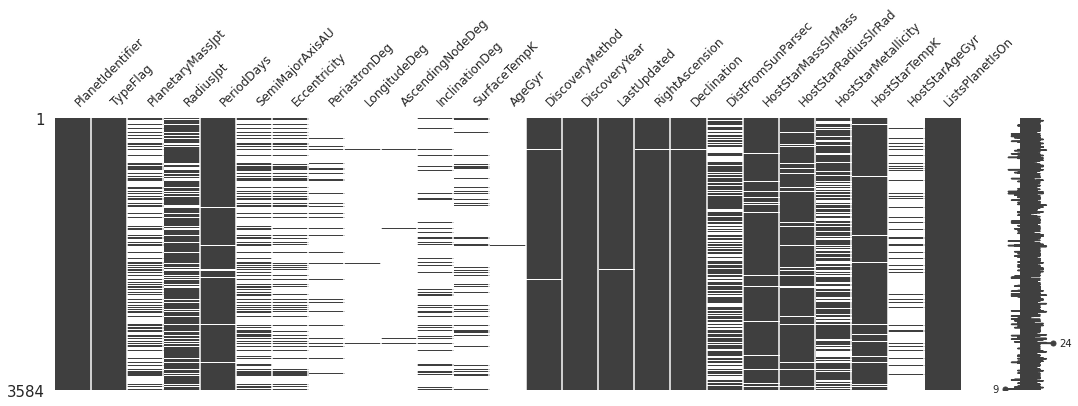

In [9]:
msno.matrix(planets,  figsize=(18,5), fontsize=12)
plt.show()

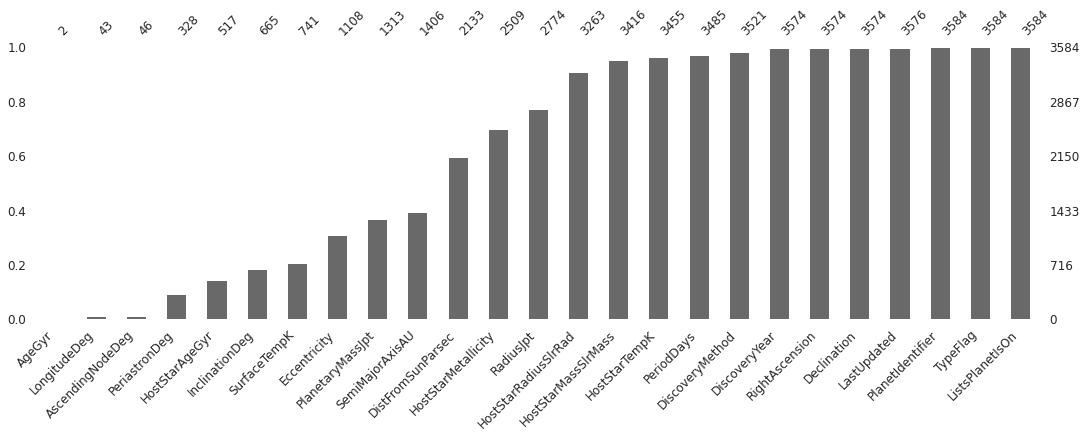

In [10]:
msno.bar(planets, sort='ascending',  figsize=(18,5), fontsize=12 )
plt.show()

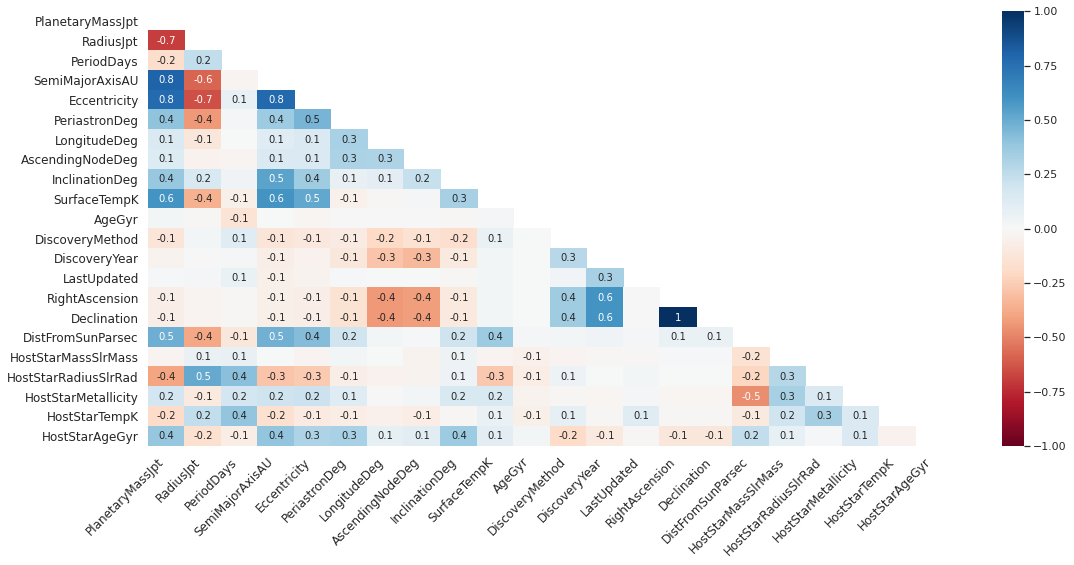

In [11]:
# Macierz korelacji dotycząca lokalizacji brakujących wartości w kolumnach

# Wartość zbliżona -1 oznacza, że jeśli poPlanetIdentifiery występowaniem brakujących wartości dwóch zmiennych.
# Wartość zbliżona 1 oznacza, że jeśli pojawi się jedna zmienna, to bardzo prawdopodobne, że druga zmienna będzie obecna.
msno.heatmap(planets, figsize=(18,8), fontsize=12)
plt.show()

## <a name='3'></a> Przeglądanie danych


### <a name='4'></a> Metoda odkrywania


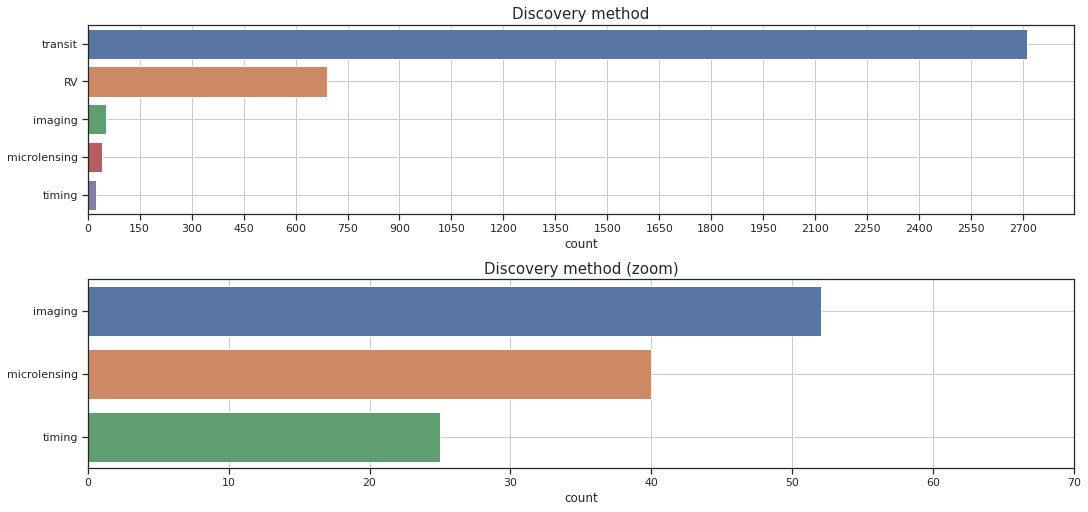

In [12]:
g, ax = plt.subplots(2, 1, figsize=(15, 7), constrained_layout=True)

g1 = sns.countplot(y='DiscoveryMethod', order=planets['DiscoveryMethod'].value_counts().index, data=planets,  ax=ax[0])
g1.set_title('Discovery method', fontsize=15)
g1.set_ylabel('') 
g1.set_xticks(np.arange(0, 2800, step=150))
g1.grid()

g2 = sns.countplot(y='DiscoveryMethod', order=planets['DiscoveryMethod'].value_counts().iloc[2:].index, data=planets,  ax=ax[1])
g2.set_title('Discovery method (zoom)', fontsize=15)
g2.set_ylabel('') 
g2.set_xticks(np.arange(0, 80, step=10))
g2.grid()


plt.show()

### <a name='5'></a> Kategorie odkryć planet

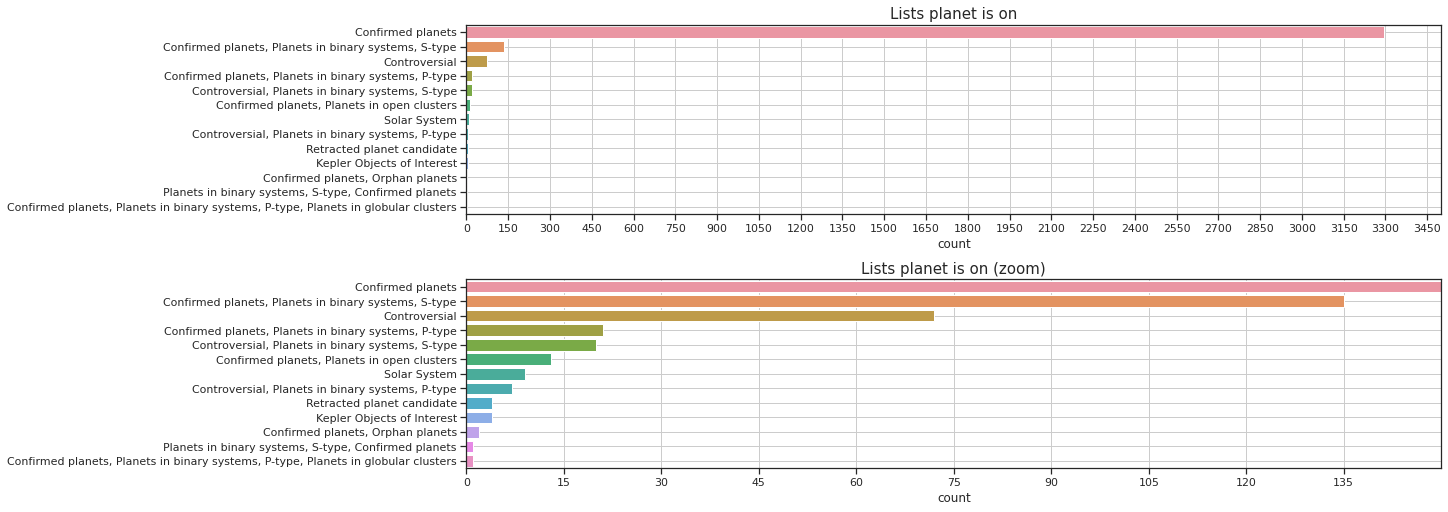

In [13]:
g, ax = plt.subplots(2, 1, figsize=(20, 7), constrained_layout=True)

g1 = sns.countplot(y='ListsPlanetIsOn', data=planets, order=planets['ListsPlanetIsOn'].value_counts().index, ax=ax[0])
g1.set_xticks(np.arange(0, 3500, step=150))
g1.set_xlim(0, 3500)
g1.set_title('Lists planet is on', fontsize=15)
g1.set_ylabel('') 
g1.grid()

g2 = sns.countplot(y='ListsPlanetIsOn', data=planets, order=planets['ListsPlanetIsOn'].value_counts().index, ax=ax[1])
g2.set_xticks(np.arange(0, 150, step=15))
g2.set_xlim(0, 150)
g2.set_title('Lists planet is on (zoom)', fontsize=15)
g2.set_ylabel('')
g2.grid()  

plt.show()

### <a name='6'></a> Liczba odkrytych planet w latach 1992 - 2017



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


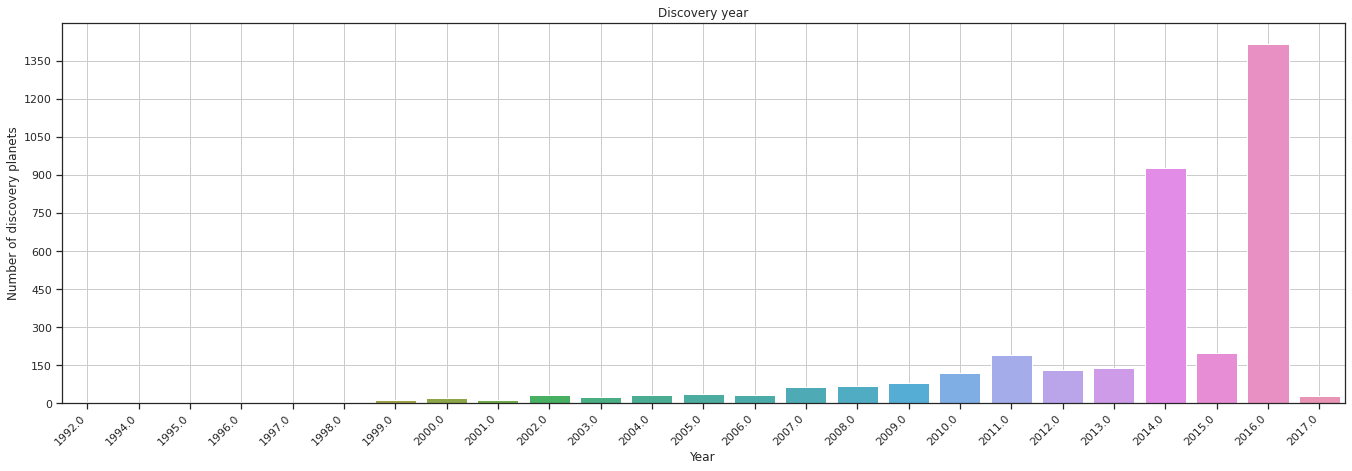

In [14]:
plt.figure(figsize=(23,7))

discovery = planets['DiscoveryYear'].sort_values( ascending=True) >= 1990

g = sns.countplot(x='DiscoveryYear', data=planets[discovery])
g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )

g.set_yticks(np.arange(0, 1500, step=150))
g.set_ylim(0, 1500)
g.set( ylabel='Number of discovery planets', xlabel='Year', title='Discovery year')

g.grid()
plt.show()

### <a name='7'></a>Mapa korelacji

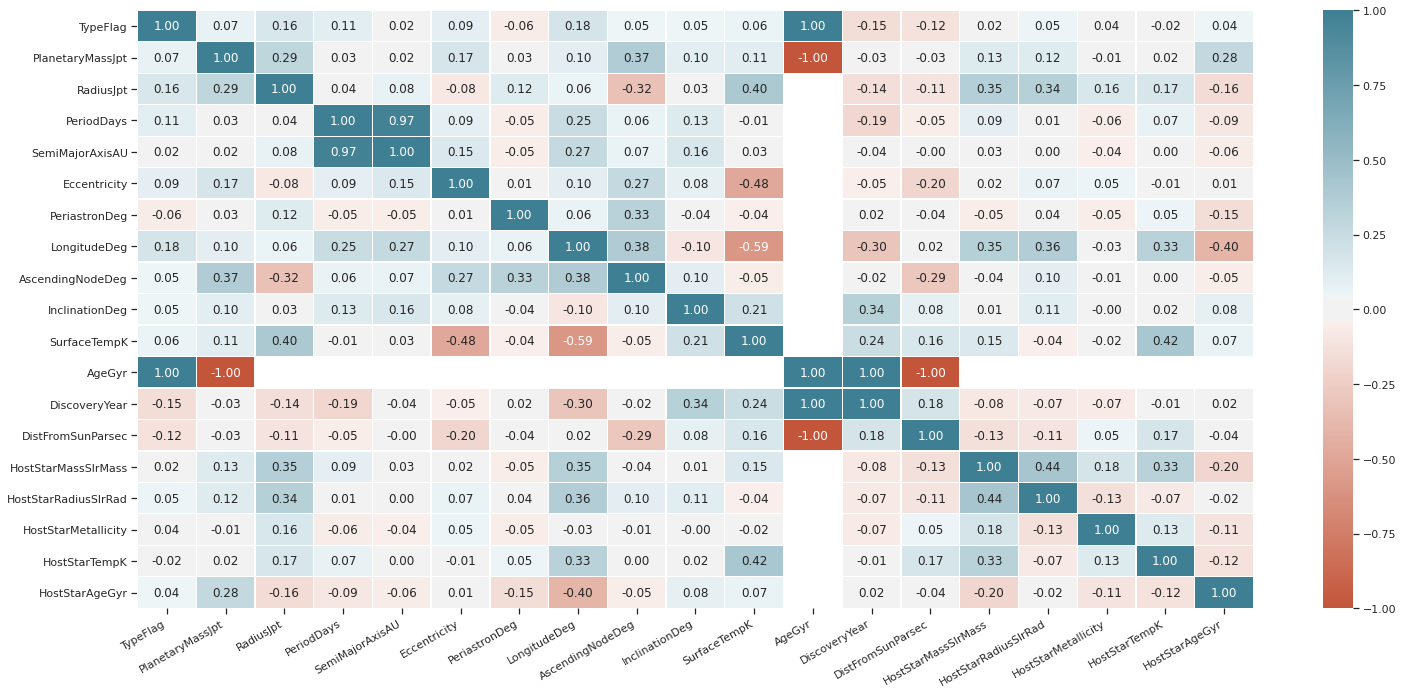

In [15]:
fig = plt.figure(figsize=(25,11))planet

corr= planets.corr()
g = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', linewidth=.3, cmap=sns.diverging_palette(20, 220, n=256))
g.set_xticklabels( g.get_xticklabels(), rotation=30,  horizontalalignment='right', fontweight='light' )
plt.show()